In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [124]:
data = pd.read_csv("Final_data50-50.csv")
train, test = train_test_split(data, test_size = 0.2)
features = list(data.columns[1:32])
X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']

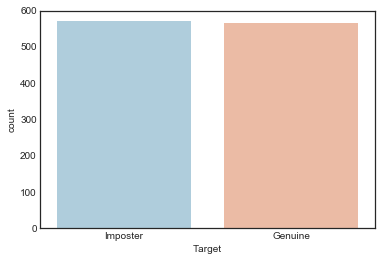

In [125]:
sns.countplot(x='Target',data=train,palette='RdBu_r')

In [126]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

[[141   3]
 [  8 133]]


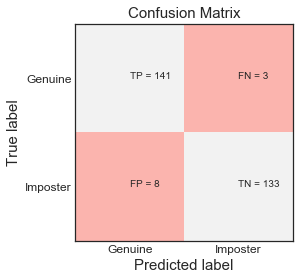

In [127]:
pred = knn.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)
sns.set_style('white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Genuine','Imposter']
plt.title('Confusion Matrix',fontsize = 15)
plt.ylabel('True label',fontsize=15)
plt.xlabel('Predicted label',fontsize=15)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames,fontsize=12)
plt.yticks(tick_marks, classNames,fontsize=12)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [128]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

    Genuine       0.95      0.98      0.96       144
   Imposter       0.98      0.94      0.96       141

avg / total       0.96      0.96      0.96       285



In [129]:
model_accuracy = metrics.accuracy_score(y_test, pred)
print('Accuracy of Model is : ',model_accuracy)

Accuracy of Model is :  0.9614035087719298


In [130]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

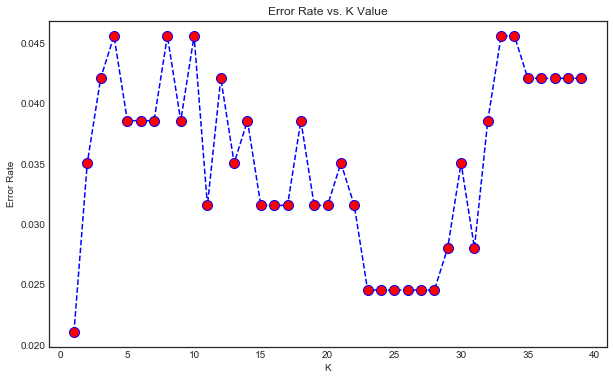

In [131]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [132]:
error_rate = []

# Will take some time
for i in range(1,70):
    train, test = train_test_split(data, test_size = 0.2, random_state=i)
    features = list(data.columns[1:32])
    X = data[features]
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

(array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]),
 <a list of 7 Text yticklabel objects>)

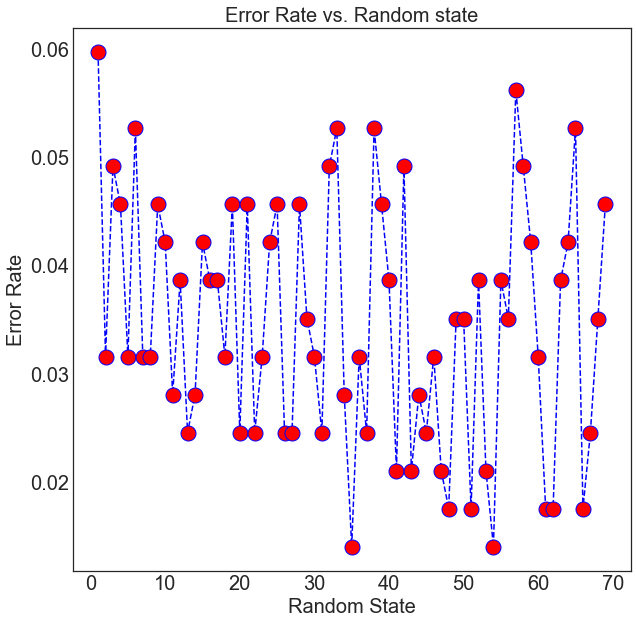

In [133]:
ax =plt.figure(figsize=(10,10))
plt.plot(range(1,70),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=15,)
plt.title('Error Rate vs. Random state',fontsize=20)
plt.xlabel('Random State',fontsize=20)
plt.ylabel('Error Rate',fontsize=20)
# plt.axis([1,70,0.1,])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


In [134]:
plt

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [135]:
C_prange = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
accuracy = []

for i in C_prange:
      
    train, test = train_test_split(data, test_size = i,random_state = 33)
    features = list(data.columns[1:32])
    X = data[features]
    y =data['Target']
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    model_accuracy = metrics.accuracy_score(y_test,pred)
    accuracy.append(model_accuracy)

Text(0,0.5,'Accuracy')

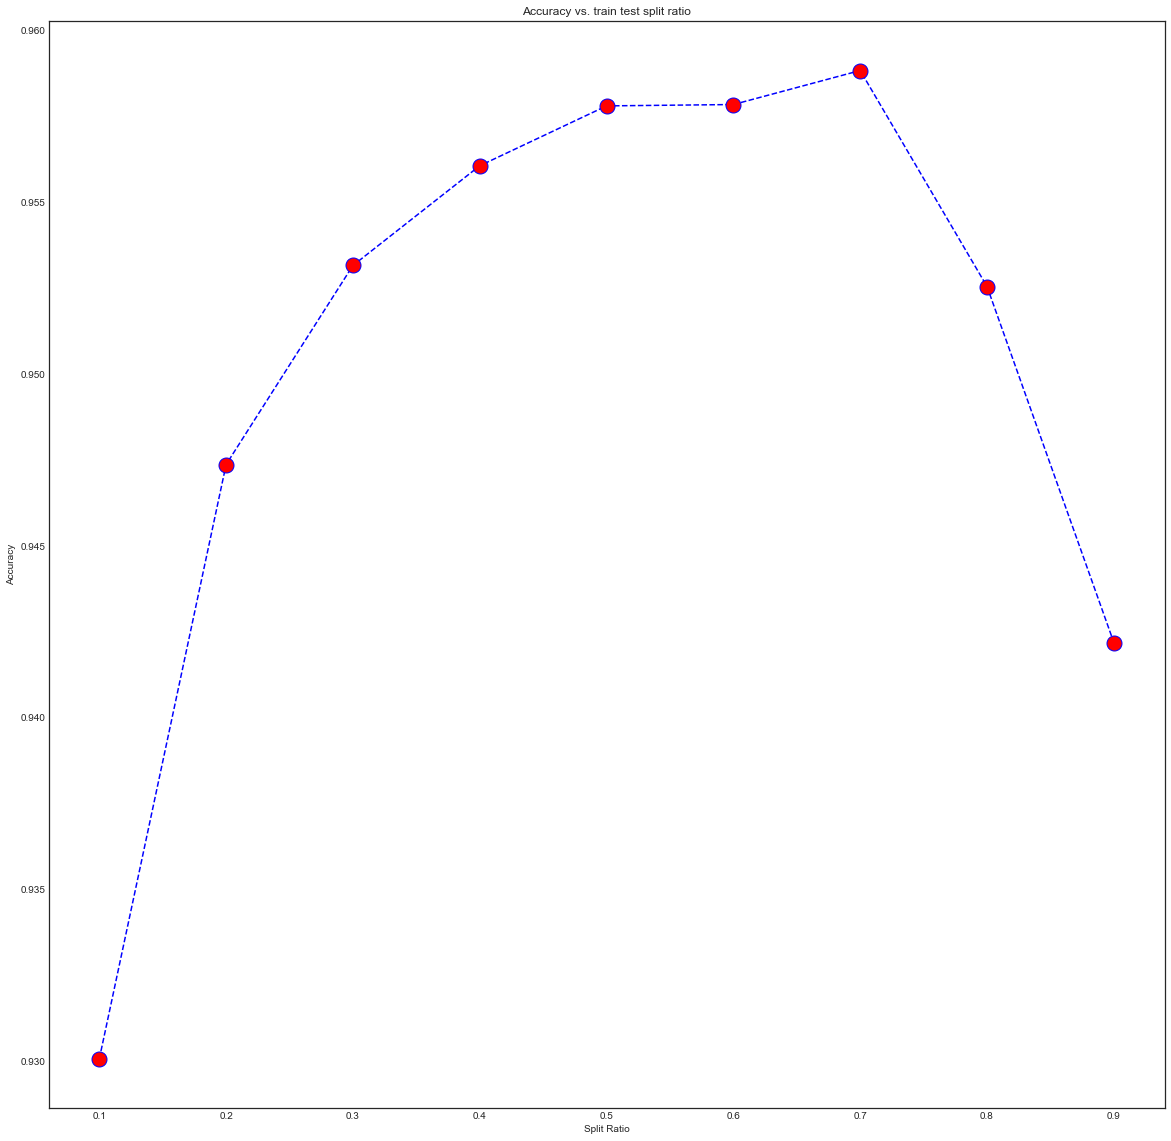

In [136]:
ax =plt.figure(figsize=(20,20))
plt.plot(C_prange,accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=15)
plt.title('Accuracy vs. train test split ratio')
plt.xlabel('Split Ratio')
plt.ylabel('Accuracy')

In [137]:
data = pd.read_csv("Final_data50-50.csv")
train, test = train_test_split(data, test_size = 0.2, random_state=33)
features = list(data.columns[1:32])


X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

[[135   7]
 [  8 135]]


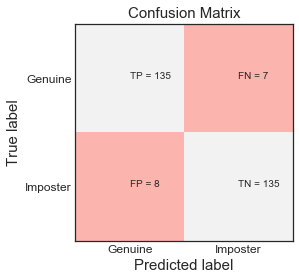

In [138]:
pred = knn.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(confusion_matrix(y_test,pred))
sns.set_style('white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Genuine','Imposter']
plt.title('Confusion Matrix',fontsize = 15)
plt.ylabel('True label',fontsize=15)
plt.xlabel('Predicted label',fontsize=15)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames,fontsize=12)
plt.yticks(tick_marks, classNames,fontsize=12)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [139]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

    Genuine       0.94      0.95      0.95       142
   Imposter       0.95      0.94      0.95       143

avg / total       0.95      0.95      0.95       285



In [140]:
model_accuracy = metrics.accuracy_score(y_test, pred)
print('Accuracy of Model is : ',model_accuracy)

Accuracy of Model is :  0.9473684210526315
